In [22]:
# imports
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import Image, display

# Fundamentos de estadística descriptiva

### Ciencia de Datos para físicos: teoría y aplicaciones.

En este notebook se presentan los fundamentos de la estadística descriptiva, que es la rama de la estadística que se encarga de resumir y describir los datos de una manera concisa y sencilla. Se mostrarán algunos conceptos como la media, la mediana, la moda, la varianza, la desviación estándar, la covarianza y la correlación. Además, se presentan los conceptos de distribución de probabilidad, función de densidad de probabilidad y función de distribución acumulada. Se presentan ejemplos de cómo calcularlos en Python y cómo graficarlos.

#### Introducción

Cuando se quieren hacer observaciones sobre los datos que estamos analizando o que analizaremos, casi siempre se recurre a la estadística.

Los datos que se obtienen se denominan **muestra** (sample), la cual se observó o extrajo a partir de la población y son un subconjunto de la misma.

La estadística puede dividirse en dos grandes ramas: la estadística descriptiva y la estadística inferencial. La estadística descriptiva se encarga de resumir y describir la muestra. La estadística inferencial se encarga de inferir o deducir algunas características de la población a partir de la muestra.

La mayoría de las veces, el objetivo de un analísis estádistico es crear una historia o un relato de los datos también llamado **history telling**. En muchas ocasiones, es muy fácil hacer un uso indebido de la estadística con lo cual se puede llegar a conclusiones erróneas.

#### Muestreo

Hay algo muy importante a recordar antes de comenzar a realizar cualquier tipo de analísis estadístico: la muestra debe ser una **muestra aleatoria** que sea reresentativa de la población. Esto quiere decir que los datos deben ser muestreados sin ningún tipo de sesgo (**bias**) y que, idealmente, la muestra debe contener miembros de todos los grupos de la población.

Existen varios tipos de sesgo estadístico, algunos son:
* **Sesgo de selección**: ocurre cuando la muestra utilizada para hacer inferencias no es representativa de la población de interés. Por ejemplo, si se realiza una encuesta para conocer las preferencias políticas de los ciudadanos de un país y solo se entrevista a personas que viven en la capital, los resultados no serían válidos para la población en general.
* **Sesgo de informante**: se produce cuando la persona que proporciona la información tiene un interés en que los resultados se vean de cierta manera. Por ejemplo, si un investigador pregunta a los empleados de una empresa sobre su satisfacción laboral, es probable que obtenga respuestas más positivas que si preguntara a los despedidos.
* **Sesgo de confirmación**: es cuando una persona busca información que confirme sus creencias o prejuicios existentes, ignorando o minimizando la información que contradice sus creencias.

### Estadística descriptiva univariada

#### Medidas de tendencia central
Las medidas de tendencia central describen dónde se centra la mayoría de los datos. Es decir, describen el centro de la distribución de los datos. Las medidas de tendencia central más comunes son la **media**, la **mediana** y la **moda**. Cada una de ellas posee sus ventajas y desventajas.


##### Media
Es la más conocida, es la suma de todos los valores dividida por la cantidad de valores. Tal que así:
$$\overline{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$$

donde $x_i$ es el valor de la $i$-ésima observación.

La media es muy sensible a valores atípicos (**outliers**), es decir, valores que se alejan mucho de la mayoría de los datos. Por ejemplo, si se tiene una muestra de 10 números y uno de ellos es 100, la media será alta. Si se elimina el número 100, la media será baja.

##### Mediana
La mediana es un valor robusto a valores atípicos. Es el valor que se encuentra en el medio de la muestra ordenada de menor a mayor. Si la muestra tiene un número par de datos, la mediana es el promedio de los dos valores centrales. Mientras que si la muestra tiene un número impar de datos, la mediana es el valor central.

Dado que la mediana es el valor que se encuentra en el medio de la muestra, su interpretación es sencilla, el 50% de los datos son mayores que la mediana y el otro 50% son menores que la mediana.

##### Moda
La moda es el valor que más se repite en la muestra. En la práctica habrá casos en los que existan dos o más valores populares, en estos casos se dice que la distribución de la muestra es **multimodal**.

In [23]:
# Ignora el codigo por el momento
# Gaussiana media -3 y desviacion estandar 3, 50 valores
gauss_1 = np.random.normal(-3, 3, 50)
# Gaussiana media 5 y desviacion estandar 1, 50 valores
gauss_2 = np.random.normal(5, 1, 50)
# Crea una bimodal a partir de las dos gaussianas
bi = np.concatenate((gauss_1, gauss_2))

In [24]:
# funcion para graficar dos KDE
def plot_two_kde(dist_1, dist_2, title_1, title_2,
                 xlabel='Valores'):
    fig, ax = plt.subplots(1,2,figsize=(10, 5), sharey=True)
    sns.kdeplot(dist_1, ax=ax[0])
    ax[0].set_title(title_1)
    ax[0].set_xlabel(xlabel)
    sns.kdeplot(dist_2, ax=ax[1])
    ax[1].set_title(title_2)
    ax[1].set_xlabel(xlabel);

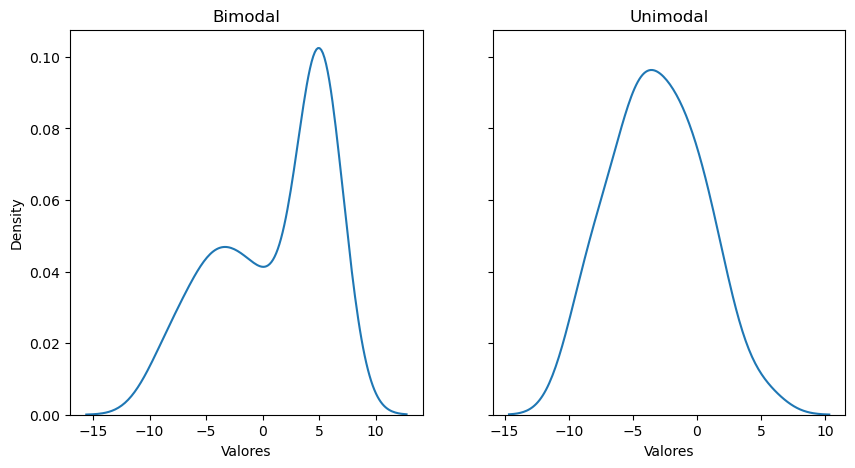

In [25]:
# plots
plot_two_kde(bi, gauss_1, title_1='Bimodal', title_2='Unimodal')

La mayoría de las veces cuando se describen datos continuos, se utiliza la media y la mediana. En cambio, cuando se describen datos discretos, se utiliza la moda.

#### Medidas de dispersión
Conocer el centro de la distribución de los datos no es suficiente, también es necesario conocer la dispersión de los datos. Esta dispersión nos dice qué tan lejos están los datos del centro. Las medidas de dispersión más comunes son la **varianza** y la **desviación estándar**.

##### Varianza
La varianza describe la distancia que separa las observaciones de su valor promedio (la media). Se calcula como la media de los cuadrados de las diferencias entre cada observación y la media. Tal que así:
$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \overline{x})^2$$

donde $x_i$ es el valor de la $i$-ésima observación y $\overline{x}$ es la media de la muestra.

La varianza da un estadístico con unidades al cuadrado, lo que es difícil de interpretar.

##### Desviación estándar
Podemos utilizar la desviación estándar para ver a qué distancia de la media se encuentran los puntos de datos en promedio. Una desviación estándar pequeña significa que los valores están cerca de la media, mientras que una desviación estándar grande significa que los valores están más dispersos. Se calcula como la raíz cuadrada de la varianza. Tal que así:
$$s = \sqrt{s^2} = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \overline{x})^2}$$

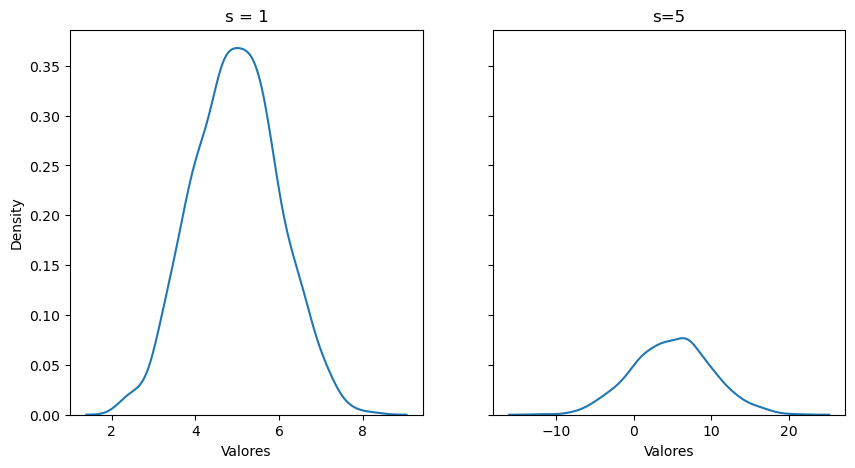

In [26]:
# Ignora el codigo por el momento
# Gaussiana media 5 y desviacion estandar 1, 100 valores
gauss_1 = np.random.normal(5, 1, 1000)
# Gaussiana media 5 y desviacion estandar 5, 100 valores
gauss_2 = np.random.normal(5, 5, 1000)

# plots
plot_two_kde(gauss_1, gauss_2, title_1='s = 1', title_2='s=5')

#### Rango intercuartílico

El rango intercuartílico es una medida de dispersión que se utiliza para datos que no siguen una distribución normal. Se calcula como la diferencia entre el tercer cuartil y el primer cuartil. Tal que así:
$$IQR = Q_3 - Q_1$$

donde $Q_3$ es el tercer cuartil (75% de los datos son menores a $Q_3$) y $Q_1$ es el primer cuartil (25% de los datos son menores a $Q_1$).

El IQR puede ser utilizado para comparar la variabilidad entre diferentes conjuntos de datos. Un conjunto de datos con un IQR grande tiene una mayor variabilidad que un conjunto de datos con un IQR pequeño.

El IQR también puede utilizarse para identificar valores atípicos (o outliers) en un conjunto de datos. Un valor es considerado como atípico si es menor que Q1 - 1.5 * IQR o mayor que Q3 + 1.5 * IQR. Esta regla se basa en la suposición de que los datos siguen una distribución normal.

#### Descripción de los datos
Usualmente antes de proceder a describir nuestros datos con la media, la mediana o la moda y realizar algún otro procedimiento estadístico, debemos mirar los cinco cuartiles, deterctar valores atípicos y visualizar su distribución. Esto nos ayudará a tener una idea de cómo se comportan nuestros datos y qué procedimientos estadísticos debemos utilizar.

La siguiente tabla resume los cinco cuartiles

| Cuartil | Percentil | Estadístico |
|:-------:|:---------:|:-----------:|
|  $Q_0$  |    0      | Valor Minímo|
|  $Q_1$  |    25     | Sin nombre  |
|  $Q_2$  |    50     | Mediana     |
|  $Q_3$  |    75     | Sin nombre  |
|  $Q_4$  |    100    | Valor Máximo|

Una forma sencilla de visualizar los cinco cuartiles es mediante un diagrama de caja (**boxplot**). Un diagrama de caja es una representación gráfica de los cinco cuartiles de una muestra de datos. El diagrama de caja se compone de un rectángulo que contiene la mayor parte de los datos, con una línea vertical en el centro. Los cuartiles se representan como líneas horizontales que se extienden desde el rectángulo. Los valores atípicos se representan como puntos fuera del diagrama de caja.

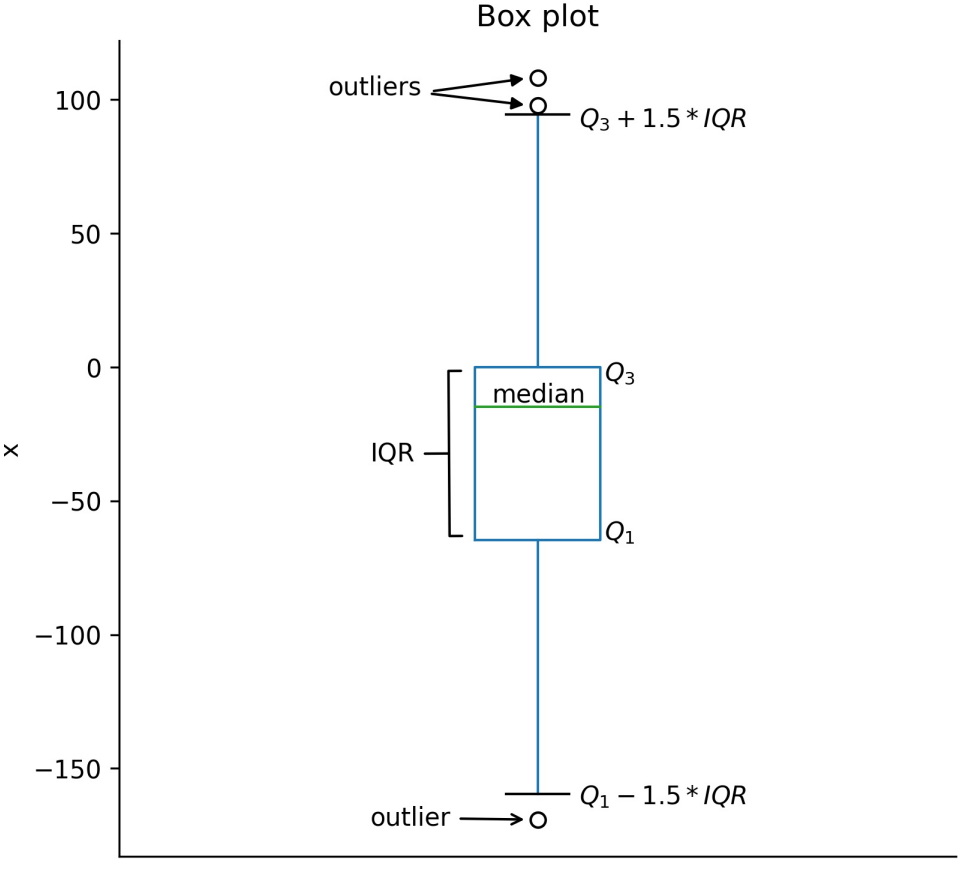

In [27]:
display(Image("../Imágenes/box_plot.png"))

Imagen tomada de Molin, S. Hands on Data Analysis with Pandas. 2021. Packt Publishing Ltd.

Cuidado con desechar los valores atípicos, ya que pueden ser datos que nos ayuden a entender mejor nuestro problema. Y no necesariamente son variables que estén mal, pueden ser variables que estén bien pero que no se ajusten a la distribución de los datos.

El boxplot nos ofrece una idea de la distribución de los datos, pero no nos dice nada sobre la forma de la distribución. Para esto podemos utilizar un **histograma** o **Kernel Density estimates**. 

Un histograma es una representación gráfica de la frecuencia de cada valor en una muestra de datos. Los valores se agrupan en intervalos y la frecuencia de cada intervalo se representa como una barra. Los intervalos se conocen como **bins**. Los histogramas se recomiendan cuando se tienen variables discretas.

Un Kernel Density Estimate (KDE) es una representación gráfica de la distribución de probabilidad de una variable. Se utiliza para variables continuas. Un KDE es una curva suave que se ajusta a los datos, la cual es una estimación de la función de densidad de probabilidad o **probability density function (PDF)**. La PDF nos dice cómo se distribuye la probabilidad sobre los valores. Los valores más altos PDF indican probabilidades más altas 

Pueden usarse histogramas para variables continuas, sin embargo, una mala elección de los bins puede hacer que la distribución de los datos se vea distorsionada.

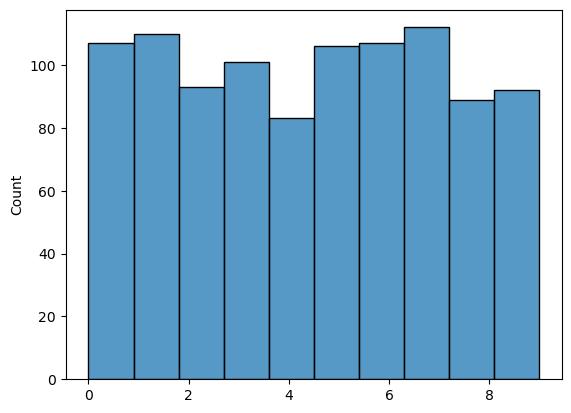

In [28]:
discreta = np.random.randint(0, 10, 1000)
sns.histplot(discreta, bins=10);

En este mundillo solemos decir que una distribución está sesgada a la izquierda o derecha cuando la cola de la distribución está más extendida hacia un lado. Esto se debe a que la media y la mediana no coinciden, y la media es mayor o menor que la mediana respectivamente.

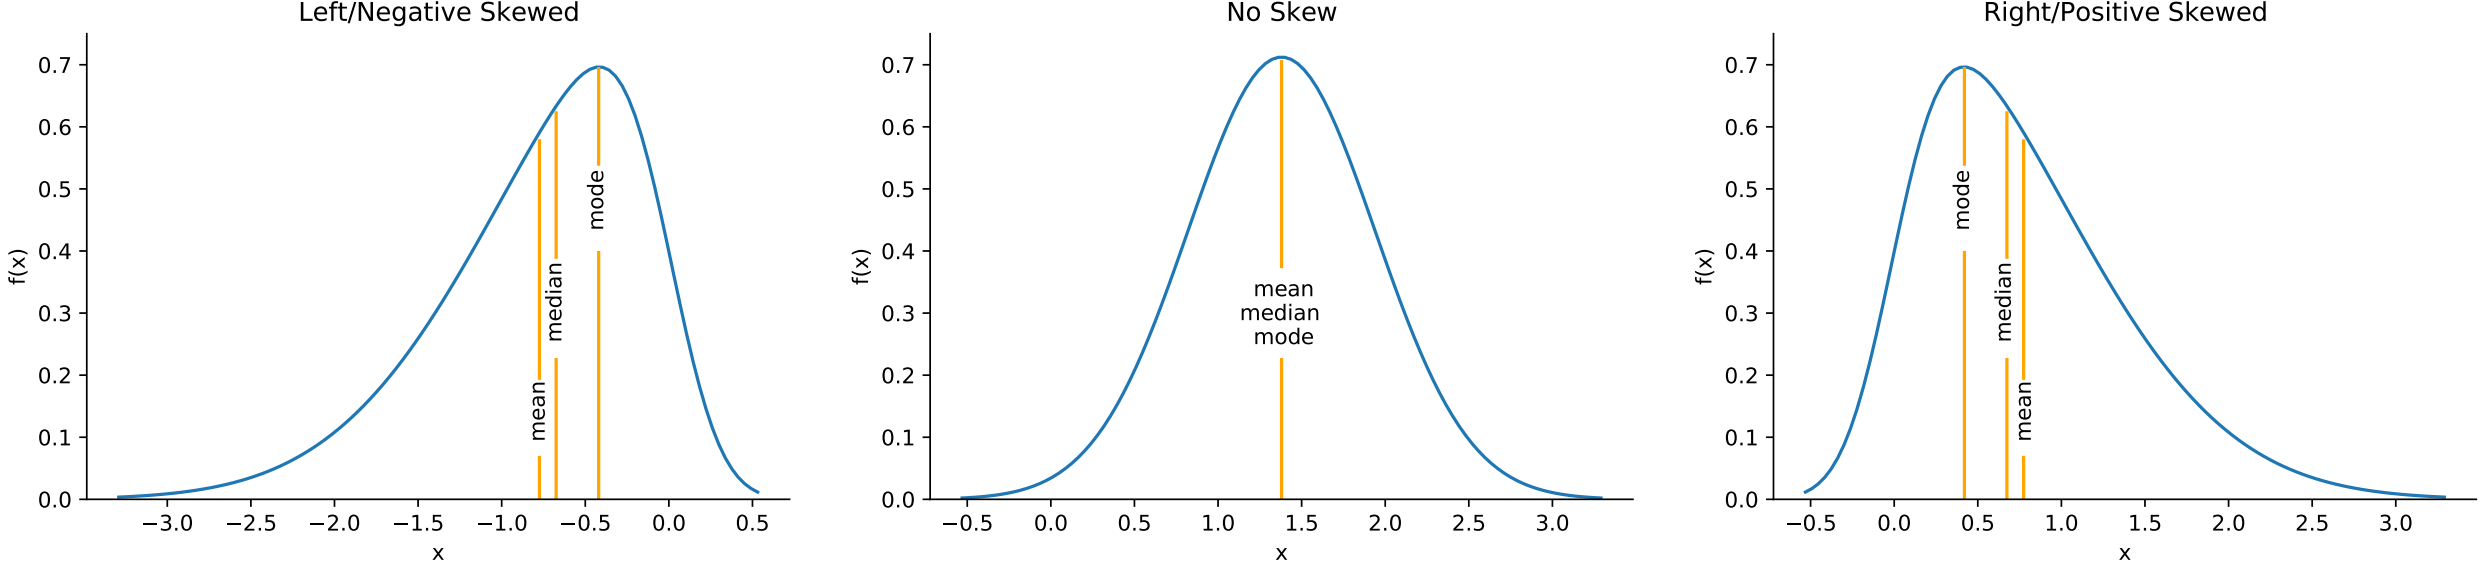

In [29]:
display(Image("../Imágenes/sesgo_dist.png"))